In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


In [3]:
train_images, test_images = train_images/255.0, test_images/255.0

from sklearn.model_selection import train_test_split
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

print("Train images shape:", train_images.shape)
print("Validation images shape", validation_images.shape)

Train images shape: (48000, 28, 28)
Validation images shape (12000, 28, 28)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_data=(validation_images, validation_labels))

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 1.3304 - accuracy: 0.6653 - val_loss: 0.7044 - val_accuracy: 0.8366
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5941 - accuracy: 0.8405 - val_loss: 0.4658 - val_accuracy: 0.8770
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4540 - accuracy: 0.8726 - val_loss: 0.3857 - val_accuracy: 0.8952
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3972 - accuracy: 0.8854 - val_loss: 0.3459 - val_accuracy: 0.9043
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3616 - accuracy: 0.8963 - val_loss: 0.3202 - val_accuracy: 0.9107


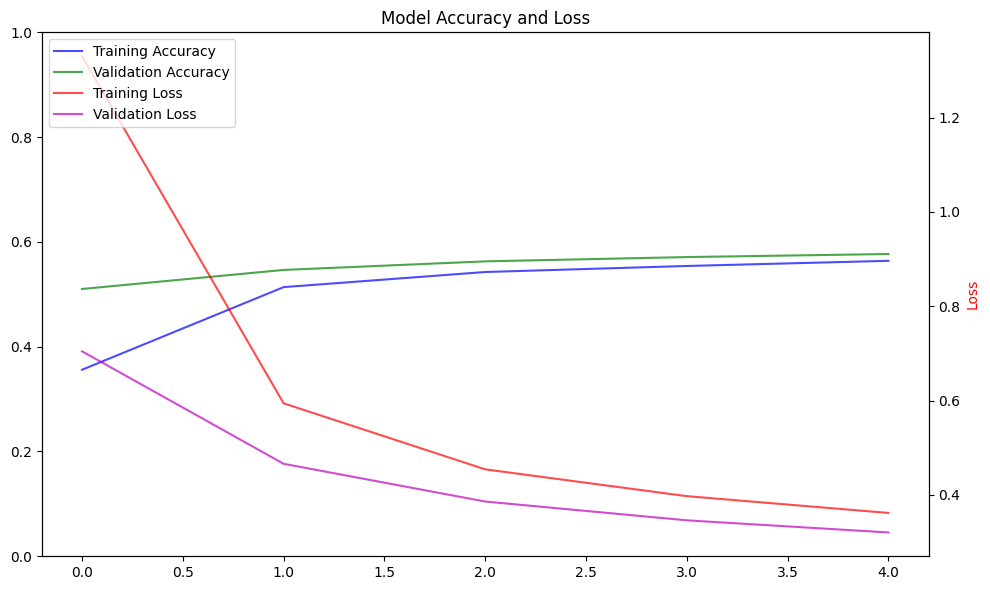

In [5]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model with history containing training and validation data

# Extract accuracy and loss from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a single plot with two axes
plt.figure(figsize=(10, 6))

# Share the x-axis for both accuracy and loss
plt.xscale('linear')  # Set x-axis to linear scale

# Plot accuracy on the left y-axis
plt.twinx()  # Create a second y-axis on the right side
plt.plot(train_acc, 'b-', label='Training Accuracy', alpha=0.7)
plt.plot(val_acc, 'g-', label='Validation Accuracy', alpha=0.7)
plt.ylabel('Accuracy', color='b')  # Set color for accuracy axis

# Plot loss on the right y-axis
plt.plot(train_loss, 'r-', label='Training Loss', alpha=0.7)
plt.plot(val_loss, 'm-', label='Validation Loss', alpha=0.7)
plt.ylabel('Loss', color='r')  # Set color for loss axis

# Set title and labels
plt.title('Model Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [10]:
import numpy as np
predicted_prob = model.predict(test_images)

predicted_labels = np.argmax(predicted_prob, axis=1)
print("predicted_labels", predicted_labels)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step
predicted_labels [7 2 1 ... 4 5 6]
313/313 [==============================] - 1s 2ms/step - loss: 0.3115 - accuracy: 0.9118
Test accuracy: 0.9118000268936157


In [9]:
from sklearn.metrics import precision_recall_fscore_support

# Tính Precision, Recall, và F1-score của từng lớp cũng như trung bình của mô hình trên tập test
precision, recall, f1_score, _ = precision_recall_fscore_support(test_labels, predicted_labels, average='weighted')

# In ra Precision, Recall, và F1-score của từng lớp và trung bình của mô hình trên tập test
print("Precision trung bình trên tập test:", precision)
print("Recall trung bình trên tập test:", recall)
print("F1-score trung bình trên tập test:", f1_score)


Precision trung bình trên tập test: 0.9115750635167315
Recall trung bình trên tập test: 0.9118
F1-score trung bình trên tập test: 0.9115186614008708


In [11]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, predicted_labels)
print("report:")
print(report)

report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       980
           1       0.95      0.97      0.96      1135
           2       0.91      0.89      0.90      1032
           3       0.90      0.89      0.89      1010
           4       0.90      0.93      0.92       982
           5       0.88      0.86      0.87       892
           6       0.93      0.94      0.94       958
           7       0.93      0.90      0.91      1028
           8       0.86      0.87      0.87       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



313/313 [==============================] - 0s 1ms/step


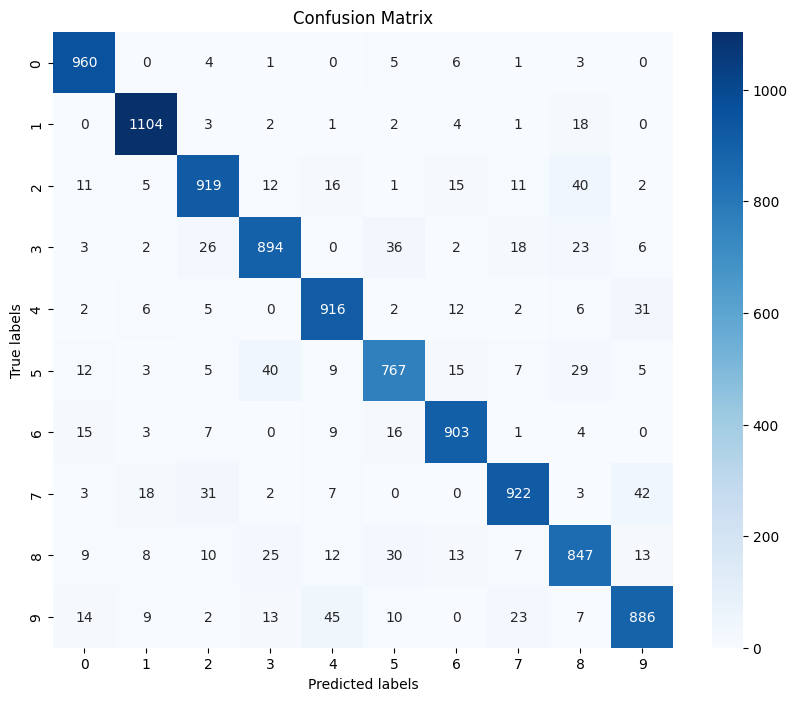

Kết quả phân lớp của 5 ảnh đầu tiên trong tập test:
Ảnh số 1: Dự đoán là 7, Nhãn thực tế là 7
Ảnh số 2: Dự đoán là 2, Nhãn thực tế là 2
Ảnh số 3: Dự đoán là 1, Nhãn thực tế là 1
Ảnh số 4: Dự đoán là 0, Nhãn thực tế là 0
Ảnh số 5: Dự đoán là 4, Nhãn thực tế là 4


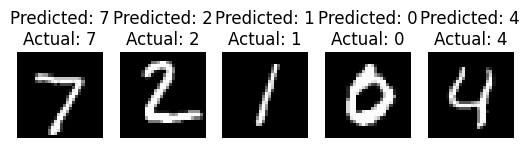

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Lấy các ảnh từ tập test và mở rộng số chiều của mỗi ảnh
test_images_expanded = np.expand_dims(test_images, axis=-1)

# Dự đoán nhãn cho các ảnh trong tập test
predicted_labels = model.predict(test_images_expanded)
predicted_labels = np.argmax(predicted_labels, axis=1)

# Tính confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Hiển thị confusion matrix dưới dạng heat map
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# In ra kết quả phân lớp của 5 ảnh đầu tiên trong tập test
print("Kết quả phân lớp của 5 ảnh đầu tiên trong tập test:")
for i in range(5):
    predicted_label = predicted_labels[i]
    true_label = test_labels[i]
    print(f"Ảnh số {i+1}: Dự đoán là {predicted_label}, Nhãn thực tế là {true_label}")
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {test_labels[i]}")
    plt.axis('off')

313/313 [==============================] - 0s 1ms/step
05 kết quả đầu tiên mà mô hình phân loại sai:
Ảnh số 9 dự đoán là: 6  - Nhãn thực tế: 5
Ảnh số 34 dự đoán là: 0  - Nhãn thực tế: 4
Ảnh số 63 dự đoán là: 4  - Nhãn thực tế: 9
Ảnh số 64 dự đoán là: 2  - Nhãn thực tế: 3
Ảnh số 67 dự đoán là: 2  - Nhãn thực tế: 6

Các ảnh tương ứng:


<Figure size 1000x500 with 0 Axes>

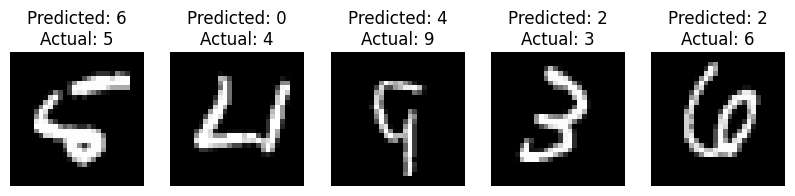

In [13]:

test_images_expanded = np.expand_dims(test_images, axis=-1)

predicted_labels = model.predict(test_images_expanded)
predicted_labels = np.argmax(predicted_labels, axis=1)

incorrect_indices = np.where(predicted_labels != test_labels)[0]

print("05 kết quả đầu tiên mà mô hình phân loại sai:")
plt.figure(figsize=(10, 5))
for i in range(5):
    index = incorrect_indices[i]
    print("Ảnh số", index+1, "dự đoán là:", predicted_labels[index], " - Nhãn thực tế:", test_labels[index])

print("\nCác ảnh tương ứng:")
plt.figure(figsize=(10, 5))
for i, index in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[index]}\nActual: {test_labels[index]}")
    plt.axis('off')
plt.show()